In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [48]:
ratings = pd.read_csv(r'ml-100k\u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
movies = pd.read_csv(r'ml-100k\u.item', sep='|', encoding='latin-1', header=None, usecols=[0, 1], names=['item_id', 'title'])
data = pd.merge(ratings, movies, on='item_id') #movie titles
print(data.head())


   user_id  item_id  rating  timestamp                       title
0      196      242       3  881250949                Kolya (1996)
1      186      302       3  891717742    L.A. Confidential (1997)
2       22      377       1  878887116         Heavyweights (1994)
3      244       51       2  880606923  Legends of the Fall (1994)
4      166      346       1  886397596         Jackie Brown (1997)


In [49]:
#How many unique users? 
data['user_id'].nunique()

943

In [50]:
#How many unique movies? 
data['item_id'].nunique()

1682

In [51]:
#Rating range? 
data['rating'].describe()

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [52]:
#Any missing values? 
data.isnull().sum()

user_id      0
item_id      0
rating       0
timestamp    0
title        0
dtype: int64

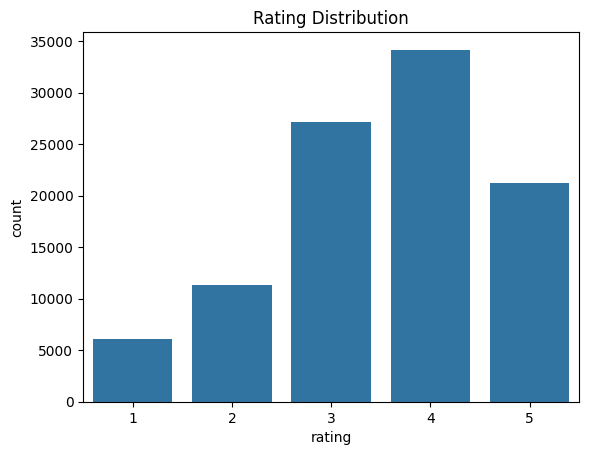

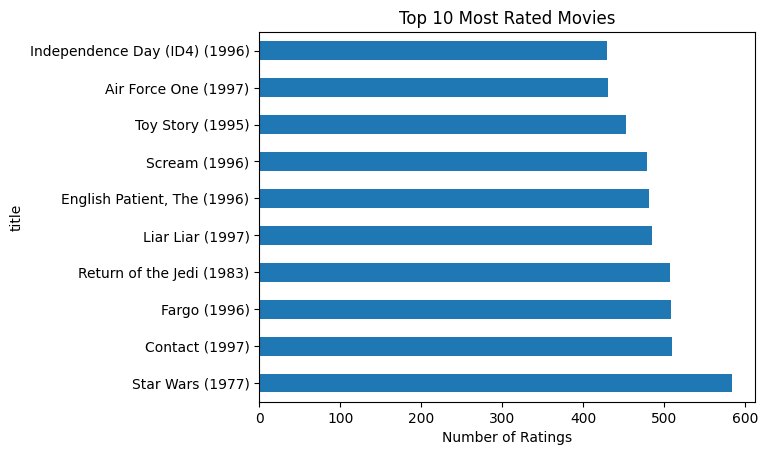

In [53]:
# Distribution of Ratings
sns.countplot(x='rating', data=data)
plt.title("Rating Distribution")
plt.show()

# Number of ratings per movie
top_movies = data['title'].value_counts().head(10)
top_movies.plot(kind='barh', title="Top 10 Most Rated Movies")
plt.xlabel("Number of Ratings")
plt.show()


In [62]:
# Load data
columns = ['user_id', 'item_id', 'rating', 'timestamp']
ratings = pd.read_csv(r'ml-100k/u.data', sep='\t', names=columns)
ratings.drop('timestamp', axis=1, inplace=True)

# Create User-Item matrix
user_item_matrix = ratings.pivot(index='user_id', columns='item_id', values='rating')
user_item_matrix.fillna(0, inplace=True)

print("Shape:", user_item_matrix.shape)
user_item_matrix.head()

Shape: (943, 1682)


item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
user_sim_matrix = cosine_similarity(user_item_matrix)
user_sim_df = pd.DataFrame(user_sim_matrix, index=user_item_matrix.index, columns=user_item_matrix.index)
user_sim_df.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.166931,0.047460,0.064358,0.378475,0.430239,0.440367,0.319072,0.078138,0.376544,...,0.369527,0.119482,0.274876,0.189705,0.197326,0.118095,0.314072,0.148617,0.179508,0.398175
2,0.166931,1.000000,0.110591,0.178121,0.072979,0.245843,0.107328,0.103344,0.161048,0.159862,...,0.156986,0.307942,0.358789,0.424046,0.319889,0.228583,0.226790,0.161485,0.172268,0.105798
3,0.047460,0.110591,1.000000,0.344151,0.021245,0.072415,0.066137,0.083060,0.061040,0.065151,...,0.031875,0.042753,0.163829,0.069038,0.124245,0.026271,0.161890,0.101243,0.133416,0.026556
4,0.064358,0.178121,0.344151,1.000000,0.031804,0.068044,0.091230,0.188060,0.101284,0.060859,...,0.052107,0.036784,0.133115,0.193471,0.146058,0.030138,0.196858,0.152041,0.170086,0.058752
5,0.378475,0.072979,0.021245,0.031804,1.000000,0.237286,0.373600,0.248930,0.056847,0.201427,...,0.338794,0.080580,0.094924,0.079779,0.148607,0.071459,0.239955,0.139595,0.152497,0.313941


In [64]:
def predict_user_based(user_id, item_id, k=5):
    if item_id not in user_item_matrix.columns:
        return 0

    # Get similarity scores for target user to all other users
    sim_scores = user_sim_df[user_id]
    ratings_of_item = user_item_matrix[item_id]

    # Keep only users who rated the item
    valid_ratings = ratings_of_item[ratings_of_item > 0]
    sim_scores = sim_scores[valid_ratings.index]

    if len(sim_scores) == 0:
        return 0

    # Take top k similar users
    top_k_users = sim_scores.sort_values(ascending=False)[:k]
    top_k_ratings = valid_ratings[top_k_users.index]

    # Weighted average
    if top_k_users.abs().sum() == 0:
        return 0
    predicted_rating = np.dot(top_k_users, top_k_ratings) / top_k_users.abs().sum()
    return predicted_rating


In [71]:
item_sim_matrix = cosine_similarity(user_item_matrix.T)
item_sim_df = pd.DataFrame(item_sim_matrix, index=user_item_matrix.columns, columns=user_item_matrix.columns)
item_sim_df.head()

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
item_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.402382,0.330245,0.454938,0.286714,0.116344,0.620979,0.481114,0.496288,0.273935,...,0.035387,0.0,0.000000,0.000000,0.035387,0.0,0.0,0.0,0.047183,0.047183
2,0.402382,1.000000,0.273069,0.502571,0.318836,0.083563,0.383403,0.337002,0.255252,0.171082,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.078299,0.078299
3,0.330245,0.273069,1.000000,0.324866,0.212957,0.106722,0.372921,0.200794,0.273669,0.158104,...,0.000000,0.0,0.000000,0.000000,0.032292,0.0,0.0,0.0,0.000000,0.096875
4,0.454938,0.502571,0.324866,1.000000,0.334239,0.090308,0.489283,0.490236,0.419044,0.252561,...,0.000000,0.0,0.094022,0.094022,0.037609,0.0,0.0,0.0,0.056413,0.075218
5,0.286714,0.318836,0.212957,0.334239,1.000000,0.037299,0.334769,0.259161,0.272448,0.055453,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.094211


In [66]:
def predict_item_based(user_id, item_id, k=5):
    if user_id not in user_item_matrix.index:
        return 0

    user_ratings = user_item_matrix.loc[user_id]
    if item_id not in item_sim_df.columns:
        return 0

    sim_scores = item_sim_df[item_id]
    rated_items = user_ratings[user_ratings > 0]

    sim_scores = sim_scores[rated_items.index]

    if len(sim_scores) == 0:
        return 0

    top_k_items = sim_scores.sort_values(ascending=False)[:k]
    top_k_ratings = rated_items[top_k_items.index]

    if top_k_items.abs().sum() == 0:
        return 0
    predicted_rating = np.dot(top_k_items, top_k_ratings) / top_k_items.abs().sum()
    return predicted_rating

In [67]:
def recommend_top_n(user_id, n=5, cf_type='item'):
    predictions = {}
    for item_id in user_item_matrix.columns:
        if user_item_matrix.loc[user_id, item_id] == 0:
            if cf_type == 'item':
                pred = predict_item_based(user_id, item_id)
            else:
                pred = predict_user_based(user_id, item_id)
            predictions[item_id] = pred

    top_n = sorted(predictions.items(), key=lambda x: x[1], reverse=True)[:n]
    return top_n

In [68]:
from sklearn.metrics import mean_squared_error

def evaluate_cf(method='user', k=5, sample_size=500):
    test_data = ratings.sample(n=sample_size, random_state=42)
    y_true, y_pred = [], []

    for _, row in test_data.iterrows():
        user, item, true_rating = row['user_id'], row['item_id'], row['rating']
        if method == 'user':
            pred_rating = predict_user_based(user, item, k)
        else:
            pred_rating = predict_item_based(user, item, k)

        if pred_rating != 0:
            y_true.append(true_rating)
            y_pred.append(pred_rating)

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{method.capitalize()}-Based CF RMSE: {rmse:.4f}")


In [73]:
def print_recommendations(user_id, n=5):
    print(f"\n Top {n} Item-Based Recommendations for User {user_id}:")
    item_recs = recommend_top_n(user_id=user_id, n=n, cf_type='item')
    for i, (item_id, rating) in enumerate(item_recs, 1):
        print(f"{i}. Item ID: {item_id:<5} | Predicted Rating: {rating:.2f}")

    print(f"\n Top {n} User-Based Recommendations for User {user_id}:")
    user_recs = recommend_top_n(user_id=user_id, n=n, cf_type='user')
    for i, (item_id, rating) in enumerate(user_recs, 1):
        print(f"{i}. Item ID: {item_id:<5} | Predicted Rating: {rating:.2f}")


In [74]:
print_recommendations(user_id=10)
evaluate_cf(method='user')
evaluate_cf(method='item')


 Top 5 Item-Based Recommendations for User 10:
1. Item ID: 517   | Predicted Rating: 5.00
2. Item ID: 653   | Predicted Rating: 5.00
3. Item ID: 187   | Predicted Rating: 4.81
4. Item ID: 136   | Predicted Rating: 4.81
5. Item ID: 429   | Predicted Rating: 4.81

 Top 5 User-Based Recommendations for User 10:
1. Item ID: 1500  | Predicted Rating: 5.00
2. Item ID: 814   | Predicted Rating: 5.00
3. Item ID: 1122  | Predicted Rating: 5.00
4. Item ID: 1189  | Predicted Rating: 5.00
5. Item ID: 1201  | Predicted Rating: 5.00
User-Based CF RMSE: 0.6452
Item-Based CF RMSE: 0.6479
